In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt   # 시각화 도와주는 패키지
import json   as j 

# 
import seaborn as sns 
import folium as f
# gmap import
import googlemaps as gmap

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [2]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')  

# 와일드카드를 활용하여 여러 파일을 로드하는 패키지
from glob import glob

In [3]:
# EDA day01 에서 copy

kowepsFrm = pd.read_excel('../../data/koweps_visualization.xlsx')
kowepsFrm.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [124]:
kowepsSubset = kowepsFrm[['h12_g3','h12_g4','h12_g10', 'h12_g11', 'h12_eco9','p1202_8aq1','h12_reg7']]
kowepsSubset.columns = ['성별','태어난 연도', '혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']
kowepsSubset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [125]:
kowepsSubset['성별'] = np.where(kowepsSubset['성별'] == 1, '남자', '여자')
kowepsSubset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,여자,1936,2,2,NaN,NaN,1
1,여자,1945,2,2,NaN,NaN,1
2,남자,1948,2,2,NaN,NaN,1
3,남자,1942,3,1,762.0,108.9,1
4,여자,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,여자,1967,1,1,952.0,NaN,5
15418,여자,1992,5,1,NaN,NaN,5
15419,남자,1995,5,1,521.0,72.0,5
15420,여자,1998,5,1,432.0,NaN,5


In [126]:
from datetime import datetime       
now_year = datetime.now().year

kowepsSubset['연령대'] = now_year - kowepsSubset['태어난 연도']

kowepsSubset['연령대'] = (kowepsSubset['연령대'] // 10)*10
kowepsSubset.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,연령대
0,여자,1936,2,2,NaN,NaN,1,80
1,여자,1945,2,2,NaN,NaN,1,70
2,남자,1948,2,2,NaN,NaN,1,70
3,남자,1942,3,1,762.0,108.9,1,80
4,여자,1923,2,1,NaN,NaN,1,100


In [127]:
print('성별, 태어난 연도, 연령대 포함하는 subset')
# kowepsSubset.columns
subset = kowepsSubset[['성별', '태어난 연도', '연령대']]
# subset.head()
# subset.info()   # 스키마 확인 
subset.describe()

성별, 태어난 연도, 연령대 포함하는 subset


,태어난 연도,연령대
count,15422.000000,15422.000000
mean,1968.436195,50.161458
std,24.321489,24.483376
min,1907.000000,0.000000
25%,1947.000000,30.000000
50%,1967.000000,50.000000
75%,1989.000000,70.000000
max,2016.000000,110.000000


In [128]:
print('결측값 확인')
subset.isnull().sum()

결측값 확인


성별        0
태어난 연도    0
연령대       0
dtype: int64

In [129]:
print('데이터 분석')
print('성별과 연령대별로 빈도수 계산')

# groupby 시 자동으로 멀티인덱스 생성
# grp = subset.groupby(by= ['성별','연령대']).count()

# ※ 성별, 연령대를 index로 사용하지 않고 일반 feature로 남기기 'as_index'
grp = subset.groupby(by= ['성별','연령대'], as_index=False).count()
grp

데이터 분석
성별과 연령대별로 빈도수 계산


,성별,연령대,태어난 연도
0,남자,0,127
1,남자,10,685
2,남자,20,756
3,남자,30,595
4,남자,40,907
5,남자,50,1033
6,남자,60,907
7,남자,70,803
8,남자,80,928
9,남자,90,230


In [130]:
# grp.index
# grp.columns
print('태어난 연도 -> 명 변경')
grp = grp.rename(columns= {'태어난 연도' : '명'})
grp

태어난 연도 -> 명 변경


,성별,연령대,명
0,남자,0,127
1,남자,10,685
2,남자,20,756
3,남자,30,595
4,남자,40,907
5,남자,50,1033
6,남자,60,907
7,남자,70,803
8,남자,80,928
9,남자,90,230


In [131]:
print('연령대를 인덱스로, 성별이 컬럼이 되고 값이 명이 배치되도록 피봇 구성')
print('pivot, pivot_table')
grp_pivot = grp.pivot('연령대', '성별','명')
grp_pivot

연령대를 인덱스로, 성별이 컬럼이 되고 값이 명이 배치되도록 피봇 구성
pivot, pivot_table


성별,남자,여자
연령대,,
0,127.0,122.0
10,685.0,656.0
20,756.0,868.0
30,595.0,651.0
40,907.0,934.0
50,1033.0,1008.0
60,907.0,1056.0
70,803.0,1180.0
80,928.0,1521.0


In [132]:
print('인덱스의 이름을 변경 0 -> 0대, 10 -> 10대')
# 방법 1
# grp_pivot.index = ['0대','10대','20대','30대','40대','50대','60대','70대','80대','90대','100대','110대']
# grp_pivot.index

인덱스의 이름을 변경 0 -> 0대, 10 -> 10대


In [133]:
# 방법 2
idxs =[]
for idx in grp_pivot.index :
    idxs.append(str(idx)+'대')
idxs

['0대',
 '10대',
 '20대',
 '30대',
 '40대',
 '50대',
 '60대',
 '70대',
 '80대',
 '90대',
 '100대',
 '110대']

In [134]:
grp_pivot.index = idxs

In [135]:
grp_pivot.index.name = '연령대'
grp_pivot

성별,남자,여자
연령대,,
0대,127.0,122.0
10대,685.0,656.0
20대,756.0,868.0
30대,595.0,651.0
40대,907.0,934.0
50대,1033.0,1008.0
60대,907.0,1056.0
70대,803.0,1180.0
80대,928.0,1521.0


성별과 연령대별 분포를 시각화


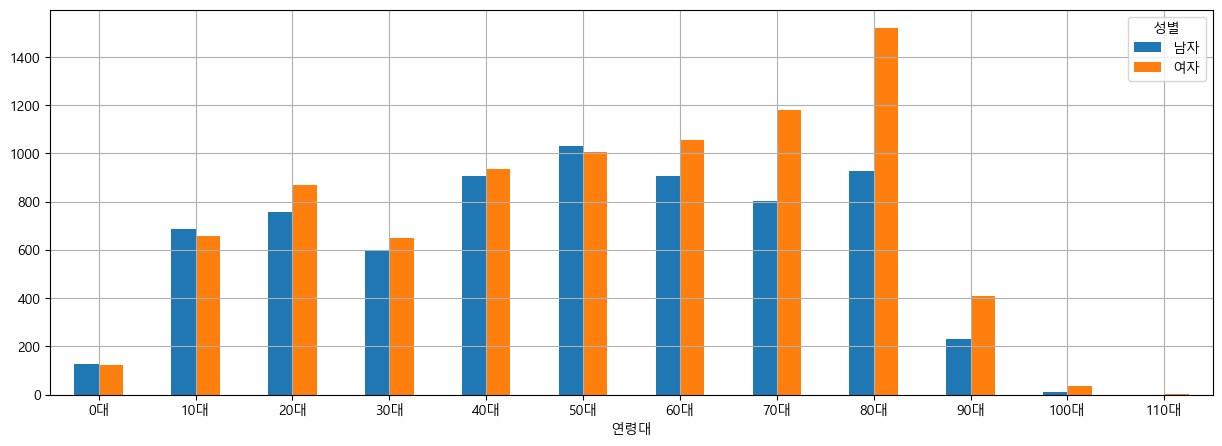

In [136]:
print('성별과 연령대별 분포를 시각화')
grp_pivot.plot(kind = 'bar', rot = 0, figsize = (15,5))

plt.grid()
plt.show()
plt.close()

성별과 연령대별 분포를 시각화 - line plot


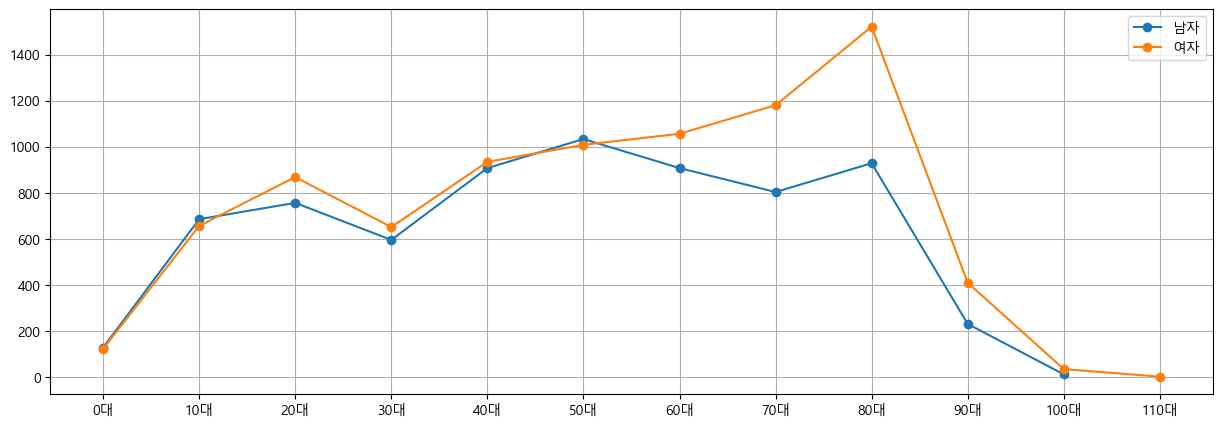

In [137]:
print('성별과 연령대별 분포를 시각화 - line plot')
# kind만 line으로 변경
# grp_pivot.plot(kind = 'line', rot = 0, figsize = (15,5))

plt.figure(figsize=(15,5))
plt.plot(grp_pivot.index , grp_pivot['남자'],
         marker = 'o',
         label = '남자')
plt.plot(grp_pivot.index , grp_pivot['여자'],
         marker = 'o',
         label = '여자')

plt.legend()
plt.grid()
plt.show()
plt.close()

In [138]:
# 데이터 분석 준비 작업
print('권역별 연령층 분포와 연령층별 지역비율을 확인하고자 한다')
print('1. 파생변수로 나이를 추가')
kowepsSubset['나이'] = now_year- kowepsSubset['태어난 연도']
kowepsSubset.head()

권역별 연령층 분포와 연령층별 지역비율을 확인하고자 한다
1. 파생변수로 나이를 추가


,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,연령대,나이
0,여자,1936,2,2,NaN,NaN,1,80,87
1,여자,1945,2,2,NaN,NaN,1,70,78
2,남자,1948,2,2,NaN,NaN,1,70,75
3,남자,1942,3,1,762.0,108.9,1,80,81
4,여자,1923,2,1,NaN,NaN,1,100,100


In [139]:
print('2. 태어난 연도를 제거')
kowepsSubset.drop('태어난 연도' , axis=1, inplace=True)
kowepsSubset

2. 태어난 연도를 제거


,성별,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,연령대,나이
0,여자,2,2,NaN,NaN,1,80,87
1,여자,2,2,NaN,NaN,1,70,78
2,남자,2,2,NaN,NaN,1,70,75
3,남자,3,1,762.0,108.9,1,80,81
4,여자,2,1,NaN,NaN,1,100,100
...,...,...,...,...,...,...,...,...
15417,여자,1,1,952.0,NaN,5,50,56
15418,여자,5,1,NaN,NaN,5,30,31
15419,남자,5,1,521.0,72.0,5,20,28
15420,여자,5,1,432.0,NaN,5,20,25


In [140]:
print('3. 새로운 코드프레임을 만들어라 - 지역코드(1) : 지역명(서울)')

codeFrm = pd.DataFrame({
    # '지역코드' : [1,2,3,4,5,6,7],
    '지역코드' : list(range(1,8)),
    '지역명'   : ['서울','수도권(인천/경기)','부산/경남/울산','대구/경북','대전/충남','강원/충북','광주/전남/충북/제주도']
})
codeFrm

3. 새로운 코드프레임을 만들어라 - 지역코드(1) : 지역명(서울)


,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/충북/제주도


In [141]:
print('4. 프레임 병합(merge)')
reusultFrm = pd.merge(codeFrm,
         kowepsSubset,
         how = 'inner',
         left_on = '지역코드' ,
         right_on='7개 권역별 지역구분')

reusultFrm.head()
# codeFrm
# kowepsSubset

4. 프레임 병합(merge)


,지역코드,지역명,성별,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,연령대,나이
0,1,서울,여자,2,2,NaN,NaN,1,80,87
1,1,서울,여자,2,2,NaN,NaN,1,70,78
2,1,서울,남자,2,2,NaN,NaN,1,70,75
3,1,서울,남자,3,1,762.0,108.9,1,80,81
4,1,서울,여자,2,1,NaN,NaN,1,100,100


In [142]:

print('Q1) 데이터 분석')
print('나이 구간을 설정 나이 < 30 : 청년층, 나이 < 60 : 중년층, 나머지는 노년층')
print('연령대를 나이구간으로 변경 (청/중/노년)')
def ageFunc(age) :
    if age < 30 :
        return '청년층'
    elif age < 60 :
        return '중년층'
    else :
        return '노년층'

reusultFrm['연령대'] = reusultFrm['나이'].apply( lambda x : ageFunc(x) )
reusultFrm.head()

Q1) 데이터 분석
나이 구간을 설정 나이 < 30 : 청년층, 나이 < 60 : 중년층, 나머지는 노년층
연령대를 나이구간으로 변경 (청/중/노년)


,지역코드,지역명,성별,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,연령대,나이
0,1,서울,여자,2,2,NaN,NaN,1,노년층,87
1,1,서울,여자,2,2,NaN,NaN,1,노년층,78
2,1,서울,남자,2,2,NaN,NaN,1,노년층,75
3,1,서울,남자,3,1,762.0,108.9,1,노년층,81
4,1,서울,여자,2,1,NaN,NaN,1,노년층,100


In [146]:
print('지역과 연령층에 대한 빈도분포를 확인하고 ')
print('분석결과를 pivot으로 구축 : 지역명을 인덱스로, 연령층을 column으로, 값을 나이로 함')
print('시각화 - bar, 비율 - pie')
# reusultFrm.groupby
# reusultFrm.columns
grp = reusultFrm[['지역명','연령대','나이']].groupby(['지역명','연령대'], as_index = False).count()
grp

지역과 연령층에 대한 빈도분포를 확인하고 
분석결과를 pivot으로 구축 : 지역명을 인덱스로, 연령층을 column으로, 값을 나이로 함
시각화 - bar, 비율 - pie


,지역명,연령대,나이
0,강원/충북,노년층,605
1,강원/충북,중년층,345
2,강원/충북,청년층,230
3,광주/전남/충북/제주도,노년층,1340
4,광주/전남/충북/제주도,중년층,849
5,광주/전남/충북/제주도,청년층,560
6,대구/경북,노년층,1021
7,대구/경북,중년층,524
8,대구/경북,청년층,329
9,대전/충남,노년층,604


In [149]:
grp.rename(columns = {'나이' : '인원수'}, inplace = True)
grp

,지역명,연령대,인원수
0,강원/충북,노년층,605
1,강원/충북,중년층,345
2,강원/충북,청년층,230
3,광주/전남/충북/제주도,노년층,1340
4,광주/전남/충북/제주도,중년층,849
5,광주/전남/충북/제주도,청년층,560
6,대구/경북,노년층,1021
7,대구/경북,중년층,524
8,대구/경북,청년층,329
9,대전/충남,노년층,604


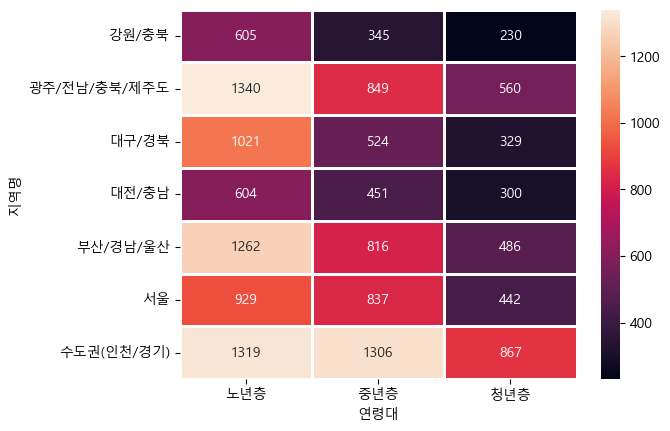

In [151]:
table = grp.pivot('지역명','연령대', '인원수')

sns.heatmap(table, annot = True, fmt ='d', linewidths=1, cbar=True )

plt.show()
plt.close()

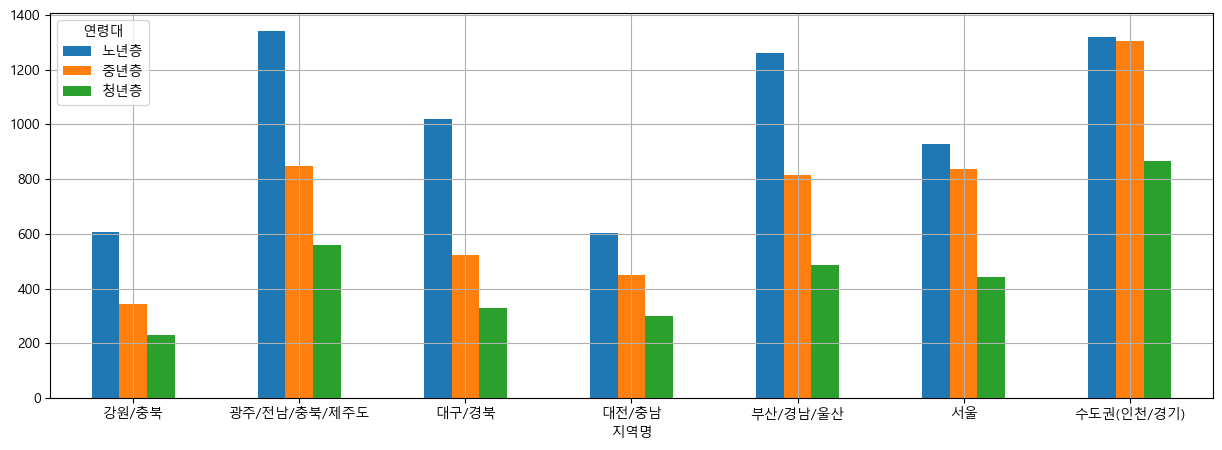

In [152]:
table.plot(kind = 'bar', figsize = (15,5), rot = 0)

plt.grid()
plt.show()
plt.close()

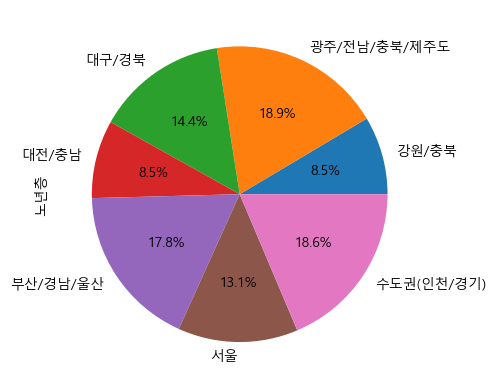

In [157]:
# table['노년층']     # series
table['노년층'].plot(kind = 'pie', autopct = '%1.1f%%')

plt.show()
plt.close()